In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges arwe rcorded

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df.duplicated().sum()

0

In [23]:
df["customerID"].duplicated().sum()

0

In [26]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)        

#converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

C:\Users\swapnil\AppData\Local\Temp\ipykernel_16304\1146888299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=palette)


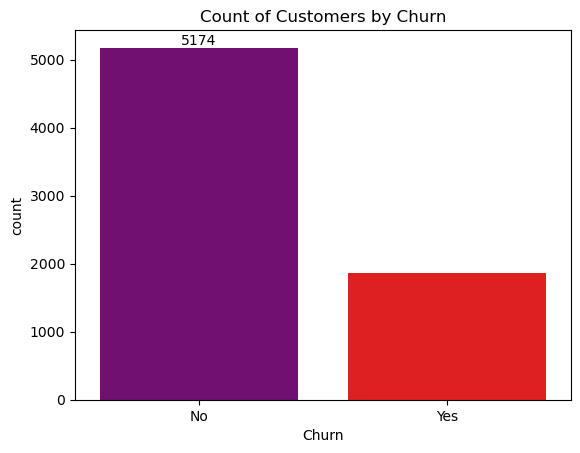

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Churn', data=df, palette=palette)
palette = {"Yes": "red", "No": "purple"}
# Add labels on top of bars
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()


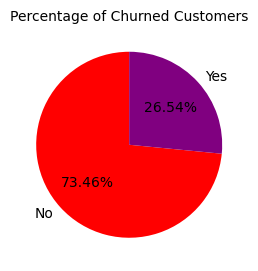

In [74]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
colors = ["red", "purple"]
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%" , startangle=90,
    colors=colors)
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers churned out

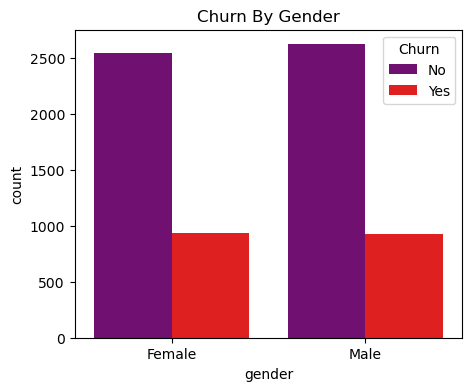

In [73]:
plt.figure(figsize = (5,4))
palette = {"Yes": "red", "No": "purple"}
sns.countplot(x="gender", data=df, hue="Churn", palette=palette)
plt.title("Churn By Gender")
plt.show()

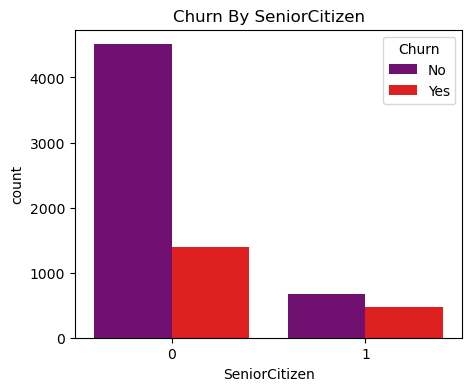

In [6]:
plt.figure(figsize = (5,4))
palette = {"Yes": "red", "No": "purple"}
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn", palette = palette)
plt.title("Churn By SeniorCitizen")
plt.show()

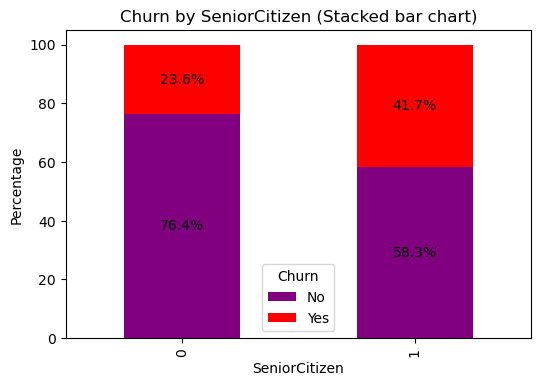

In [13]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert to percentages
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(6,4), 
                 color=["purple", "red"])

# Add labels inside bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.title("Churn by SeniorCitizen (Stacked bar chart)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

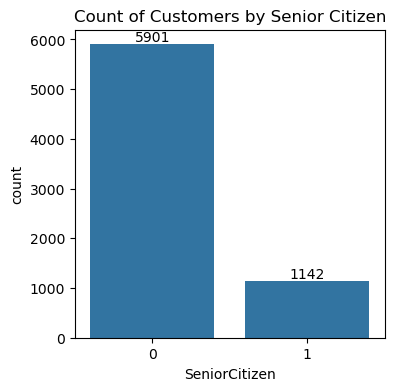

In [12]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

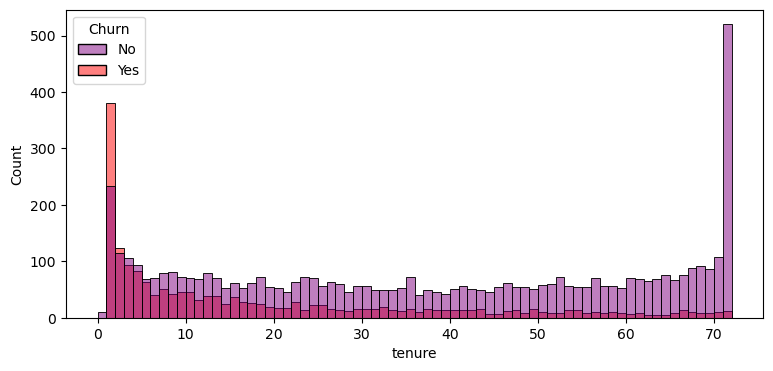

In [20]:
plt.figure(figsize = (9,4))
palette = {"Yes": "red", "No": "purple"}
sns.histplot(x="tenure", data=df, bins=72, hue="Churn", palette=palette)
plt.show

#people who have used our services for a longg time stayed and people who used our serbices #1 and #2 months have churned 

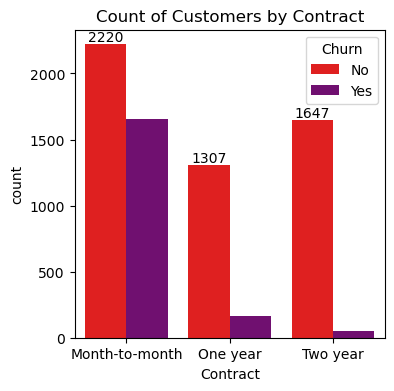

In [25]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data=df, hue = "Churn", palette=["red", "purple"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people have month to month contract are liely to churn from those who have 1 and 2 year contract

In [26]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

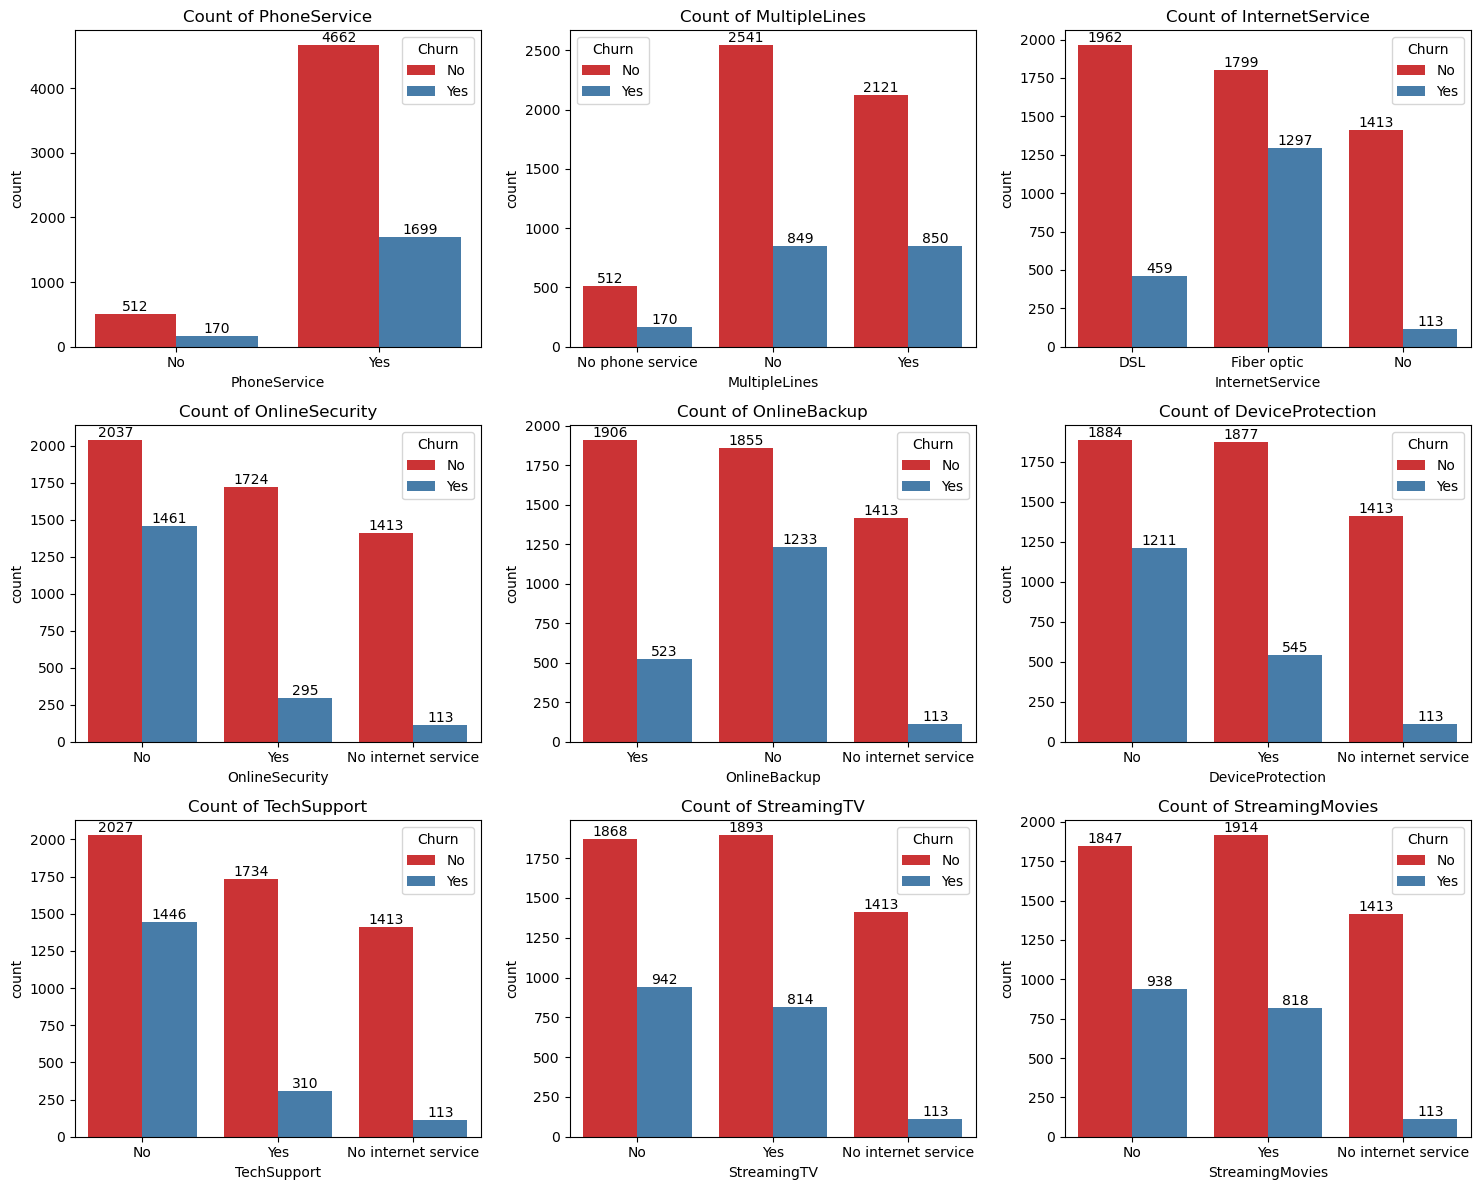

In [33]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define rows & cols for subplot grid
n_cols = 3   # 3 plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn", palette="Set1")
    ax.set_title(f"Count of {col}")
    for container in ax.containers:
        ax.bar_label(container)

# Remove empty subplots if cols not multiple of n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Most customers have PhoneService and InternetService, with churn higher among Fiber Optic users.
#Customers lacking OnlineSecurity, TechSupport, or OnlineBackup show a much higher churn rate compared to those who opted in.
#Services like StreamingTV and StreamingMovies are widely used but do not show a strong reduction in churn.
#Overall, absence of security and support services is strongly associated with customer churn.

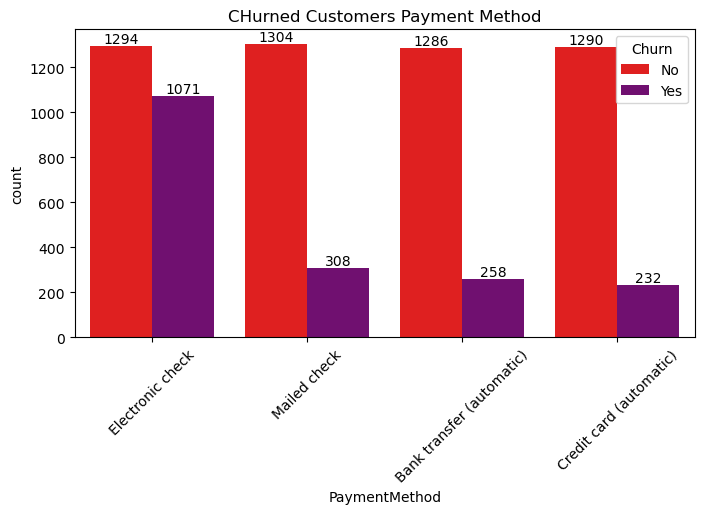

In [39]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="PaymentMethod", data=df, hue = "Churn", palette=["red", "purple"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("CHurned Customers Payment Method")
plt.xticks(rotation = 45)
plt.show()